# Comparing calculated S6/ST to measured (Muth and Wallace, 2021)
- This notebook compares measured S6/ST values to those measured using XANES for Jugo, Nash and Oneill-Mavrogenes 2022

In [1]:
#!pip install PySulfSat --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None
ss.__version__

'0.0.13'

## Load data (measured MI comps)

In [2]:
df_out=ss.import_data('Muth_data_Merged.xlsx', sheet_name='Sheet1')

df_out['Fe3Fet_Liq']=df_out['Fe3+/∑ Fe']

df_out_trim=df_out.iloc[:, 0:12]
df_out_trim['Sample_ID']=df_out['MI_Name']
df_out_trim.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID
0,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.235010,0.158692,BBL-5-32
1,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,1.232055,0.213707,BBL-5-33
2,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,1.209455,0.181930,BBL-5-34
3,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.968013,0.173842,BBL-5-43
4,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,1.024796,0.142214,BBL-5-44


In [3]:
df_err=ss.import_data_noise('Muth_data_Merged.xlsx', sheet_name='Sheet1')
df_err_trim=df_err.iloc[:, 0:12]
df_err_trim['Sample_ID']=df_err['MI_Name']
df_err_trim.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,Sample_ID
0,0.678665,0.096405,0.404524,0.303896,0.019579,0.520599,0.047518,0.264134,0.030958,0.023520,0.0,0.0,BBL-5-32
1,0.825791,0.026556,0.115552,0.420127,0.007783,0.152587,0.172061,0.212874,0.096533,0.030083,0.0,0.0,BBL-5-33
2,1.876183,0.018804,0.083276,0.194047,0.018462,0.149600,0.136053,0.187045,0.020508,0.010884,0.0,0.0,BBL-5-34
3,0.314276,0.036322,0.313526,0.424967,0.004634,0.043281,0.065173,0.272982,0.036137,0.017175,0.0,0.0,BBL-5-43
4,0.386098,0.036339,0.161871,0.387210,0.001353,0.057336,0.127017,0.097441,0.003957,0.005722,0.0,0.0,BBL-5-44


## Lets calculate a temperature 
- Using their H2O contents. 

In [4]:
import Thermobar as pt
Temp_3=pt.calculate_liq_only_temp(liq_comps=df_out, equationT='T_Put2008_eq22_BeattDMg', P=3, H2O_Liq=df_out['H2O_Liq'])
Temp_3.head()

0    1407.340081
1    1427.006146
2    1426.318219
3    1459.082125
4    1440.880509
dtype: float64

## Lets perform calcs straight up first

In [5]:
calc_GivenFe3=ss.calculate_OM2022_S6St(df=df_out_trim, T_K=Temp_3,
                    Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

calc_GivenFe3.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.213088,-3.316331,14.165511,-19.356183,-1.306411,0.938474,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.235010,0.158692,BBL-5-32,0.546628,0.089540,0.001584,0.084517,0.115094,0.108101,0.038423,0.004335,0.010465,0.001312,0.474433,0.077714,0.001375,0.073355,0.099894,0.187648,0.066697,0.007525,0.009083,0.002277,0.514420,0.557370,-8.282959,0.061714
1,0.856566,-3.054445,13.864131,-18.817435,1.787057,1.604158,49.217861,1.288750,16.749303,9.614724,0.171826,6.033436,9.214457,3.699514,0.716508,0.332001,1.232055,0.213707,BBL-5-33,0.539109,0.098521,0.001594,0.088074,0.108143,0.108113,0.039284,0.005006,0.010618,0.001539,0.467189,0.085377,0.001381,0.076324,0.093716,0.187380,0.068087,0.008677,0.009202,0.002668,0.527985,0.587220,-7.371922,0.060013
2,0.551477,-3.163752,13.828337,-18.836028,0.206641,1.249443,51.666197,1.123500,15.420533,9.144514,0.157054,6.318138,10.347291,3.389791,0.470203,0.214040,1.209455,0.181930,BBL-5-34,0.552219,0.100671,0.001422,0.081738,0.118496,0.097125,0.035123,0.003206,0.009032,0.000968,0.485928,0.088586,0.001251,0.071925,0.104271,0.170931,0.061814,0.005642,0.007948,0.001704,0.551889,0.600875,-7.735105,0.058840
3,0.555898,-2.805222,13.380534,-17.970140,0.224530,1.221990,49.585428,1.246884,16.657728,9.493343,0.186833,7.117724,8.805293,3.562566,0.792121,0.280157,0.968013,0.173842,BBL-5-43,0.535713,0.114638,0.001710,0.085773,0.101928,0.106052,0.037313,0.005459,0.010133,0.001281,0.465794,0.099676,0.001487,0.074579,0.088625,0.184422,0.064886,0.009493,0.008810,0.002228,0.572004,0.617985,-7.368103,0.061614
4,0.162507,-3.215526,13.566557,-18.446271,-1.639692,0.801218,48.499094,0.981204,18.784365,7.927122,0.143673,7.262274,11.025627,2.775515,0.278404,0.114633,1.024796,0.142214,BBL-5-44,0.523668,0.116897,0.001314,0.071580,0.127555,0.119522,0.029052,0.001917,0.007969,0.000524,0.454962,0.101560,0.001142,0.062189,0.110820,0.207680,0.050482,0.003332,0.006924,0.000910,0.620210,0.655621,-8.005795,0.053345


Text(0, 0.5, 'Calc S6/St')

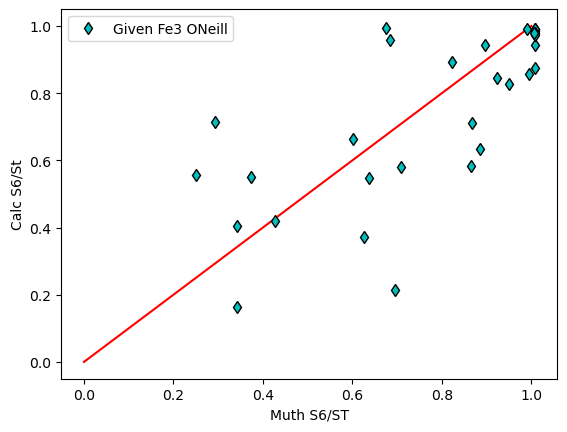

In [6]:
plt.plot([0, 1], [0, 1], '-r')

plt.plot(df_out['S6+/∑S'],
         calc_GivenFe3['S6St_Liq'],
         'dk', mfc='c', label='Given Fe3 ONeill')

plt.legend()
plt.xlabel('Muth S6/ST')
plt.ylabel('Calc S6/St')

In [7]:
pt.calculate_R2(df_out['S6+/∑S'],
         calc_GivenFe3['S6St_Liq'], xy=False)

{'R2': '0.51',
 'RMSE': '0.19',
 'RMSE_num': 0.19,
 'P_val': '0.000',
 'Median': '-0.03',
 'Mean': '-0.03',
 'Int': array([0.2016873]),
 'Grad': array([0.70240837])}

## Now lets account for error

In [8]:
N_dups=5000
# Lets set temp error at +-50 K
df_out_trim['T_K_Liq']=Temp_3
df_err_trim['T_K_Liq_Err']=50
# Take Fe3 error from other dataframe
df_err_trim['Fe3Fet_Liq_Err']=df_err['Fe3+/∑ Fe s.e.']

df_noisy_abs=ss.add_noise_2_dataframes(df_values=df_out_trim, df_err=df_err_trim, 
        error_type="Abs", error_dist="normal", N_dups=N_dups)
df_noisy_abs.head()

columns match in 2 dataframes


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,T_K_Liq,Sample_ID
0,49.681795,1.258722,17.023513,8.937017,0.208162,4.776785,9.834387,3.709982,0.618275,0.247637,1.23501,0.134307,1386.043641,BBL-5-32
1,49.100072,1.177200,16.085850,9.438068,0.196831,6.377045,9.829614,3.822948,0.627796,0.290274,1.23501,0.125402,1371.803239,BBL-5-32
2,50.185633,1.553544,17.403610,8.998662,0.192595,4.774915,9.836393,3.921206,0.618881,0.298047,1.23501,0.153793,1450.891963,BBL-5-32
3,49.120726,1.326243,16.897975,8.607139,0.180656,5.681893,9.855851,3.345146,0.597649,0.308725,1.23501,0.139741,1446.136489,BBL-5-32
4,49.560496,1.208091,16.636825,9.938062,0.163114,5.081890,9.821994,3.827857,0.607878,0.295719,1.23501,0.179224,1307.488803,BBL-5-32


## Now put all this synthetic simulated data into the S6 calculation

In [9]:
noisy_ONeill_Fe_S6St=ss.calculate_OM2022_S6St(df=df_noisy_abs, Fe3Fet_Liq=df_noisy_abs['Fe3Fet_Liq'],
                                          T_K=df_noisy_abs['T_K_Liq'])
noisy_ONeill_Fe_S6St.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,T_K_Liq,Sample_ID,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.044050,-3.566876,14.510262,-19.956984,-3.077369,0.567733,49.681795,1.258722,17.023513,8.937017,0.208162,4.776785,9.834387,3.709982,0.618275,0.247637,1.23501,0.134307,1386.043641,BBL-5-32,0.551625,0.079066,0.001958,0.082984,0.116995,0.111384,0.039933,0.004379,0.010512,0.001164,0.476829,0.068345,0.001692,0.071732,0.101131,0.192563,0.069037,0.007570,0.009087,0.002012,0.487903,0.523938,-8.927247,0.062098
1,0.025497,-3.536892,15.045608,-20.369219,-3.643355,0.433230,49.100072,1.177200,16.085850,9.438068,0.196831,6.377045,9.829614,3.822948,0.627796,0.290274,1.23501,0.125402,1371.803239,BBL-5-32,0.534903,0.103567,0.001816,0.085987,0.114737,0.103268,0.040375,0.004363,0.009647,0.001339,0.465399,0.090110,0.001580,0.074814,0.099828,0.179698,0.070257,0.007591,0.008393,0.002329,0.546364,0.579320,-9.249403,0.065432
2,0.185789,-2.978100,13.511654,-18.182893,-1.477606,0.837099,50.185633,1.553544,17.403610,8.998662,0.192595,4.774915,9.836393,3.921206,0.618881,0.298047,1.23501,0.153793,1450.891963,BBL-5-32,0.549809,0.077984,0.001787,0.082445,0.115463,0.112357,0.041646,0.004325,0.012802,0.001382,0.474092,0.067245,0.001541,0.071091,0.099562,0.193767,0.071821,0.007458,0.011039,0.002384,0.486088,0.527803,-7.849928,0.060158
3,0.102634,-3.056088,13.513729,-18.307540,-2.168299,0.699451,49.120726,1.326243,16.897975,8.607139,0.180656,5.681893,9.855851,3.345146,0.597649,0.308725,1.23501,0.139741,1446.136489,BBL-5-32,0.544501,0.093894,0.001696,0.079790,0.117058,0.110381,0.035947,0.004226,0.011058,0.001449,0.472656,0.081505,0.001472,0.069262,0.101613,0.191634,0.062408,0.007336,0.009599,0.002515,0.540593,0.577679,-8.044362,0.059583
4,0.286627,-4.174954,15.950945,-22.343802,-0.911823,1.160884,49.560496,1.208091,16.636825,9.938062,0.163114,5.081890,9.821994,3.827857,0.607878,0.295719,1.23501,0.179224,1307.488803,BBL-5-32,0.544347,0.083210,0.001517,0.091285,0.115588,0.107681,0.040758,0.004259,0.009981,0.001375,0.471675,0.072101,0.001315,0.079098,0.100157,0.186610,0.070633,0.007380,0.008648,0.002383,0.476853,0.526189,-9.420178,0.064922


## Now calculate the error bar for each row

In [10]:
Stats_Fe_S6=pt.av_noise_samples_series(calc=noisy_ONeill_Fe_S6St['S6St_Liq'], sampleID=df_noisy_abs['Sample_ID'])
Stats_Fe_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.249530,0.211174,0.176706,0.889236,0.004163
1,BBL-5-33,5000,0.819782,0.853802,0.126496,0.989324,0.123361
2,BBL-5-34,5000,0.537123,0.553346,0.208010,0.971254,0.008535
3,BBL-5-43,5000,0.535642,0.549954,0.214197,0.977726,0.007328
4,BBL-5-44,5000,0.206083,0.157377,0.168796,0.844764,0.000435


## Lets do the same using Nash
- If you just want to vary 1 thing, you can do it this way
- First, take your dataframe, and duplicate it N times, all the columns will be the same, but will now be Sample1-Sample1-Sample1, Sample2-Sample2-Sample2

In [11]:

Dupdf=ss.duplicate_dataframe(df=df_out_trim, N_dup=N_dups)
Dupdf.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID,T_K_Liq
0,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,1407.340081
1,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,1407.340081
2,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,1407.340081
3,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,1407.340081
4,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.158692,BBL-5-32,1407.340081


### Now you can make the errors for one column at a time if you prefer

- E.g. adding a temp error of +- 1sigma = 50 K

In [12]:
Temp_Err=ss.add_noise_series(df_out_trim['T_K_Liq'], error_var=50,
error_type="Abs", error_dist="normal", N_dup=N_dups)
# Then add this to the dataframe
Dupdf['T_K_MC']=Temp_Err

- And adding a Fe3Fet_Liq error from their spreadsheet

In [13]:
Fe3_Err=ss.add_noise_series(df_out_trim['Fe3Fet_Liq'], error_var=df_err_trim['Fe3Fet_Liq_Err'],
error_type="Abs", error_dist="normal", N_dup=N_dups)
## 
Dupdf['Fe3Fet_Liq_MC']=Fe3_Err

## Now put these uncertainties into Nash

In [14]:
noisy_Nash_S6St=ss.calculate_S6St_Nash2019(Fe3Fet_Liq=Dupdf['Fe3Fet_Liq_MC'],
                                          T_K=Dupdf['T_K_MC'])
noisy_Nash_S6St.head()

0    0.051072
1    0.080068
2    0.153009
3    0.241281
4    0.147065
dtype: float64

In [15]:
Stats_Nash_S6=pt.av_noise_samples_series(calc=noisy_Nash_S6St, sampleID=Dupdf['Sample_ID'])
Stats_Nash_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.193513,0.135747,0.180596,0.933403,0.000849
1,BBL-5-33,5000,0.748148,0.805766,0.198993,0.996355,0.047198
2,BBL-5-34,5000,0.458427,0.451345,0.247227,0.985307,0.002566
3,BBL-5-43,5000,0.476572,0.469164,0.252213,0.982943,0.003541
4,BBL-5-44,5000,0.151563,0.090096,0.162100,0.931300,0.000104


## And Jugo
- First, need to calculate QFM relative to frost from the Fe3Fet ratio

In [16]:
Buffer=pt.convert_fe_partition_to_fo2(liq_comps=Dupdf,  T_K=Dupdf['T_K_MC'], P_kbar=5,  
        model="Kress1991", Fe3Fet_Liq=Dupdf['Fe3Fet_Liq_MC'],
 renorm=False)
Buffer.head()

overwriting Fe3Fet_Liq to that specified in the function input
(150000,)


,DeltaQFM_Frost1991,DeltaNNO_Frost1991,fo2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Sample_ID,T_K_Liq,T_K_MC,Fe3Fet_Liq_MC,FeO_Liq,Fe2O3_Liq
0,0.130116,-0.390082,1.321036e-08,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.157991,BBL-5-32,1407.340081,1465.964858,0.157991,7.772521,1.62045
1,-0.172465,-0.683164,1.998432e-10,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.149137,BBL-5-32,1407.340081,1344.136331,0.149137,7.854257,1.529631
2,-0.101280,-0.623095,1.405274e-08,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.143448,BBL-5-32,1407.340081,1488.928263,0.143448,7.906767,1.471287
3,-0.265934,-0.780646,7.052498e-10,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.139946,BBL-5-32,1407.340081,1393.042145,0.139946,7.939094,1.435369
4,0.415091,-0.099633,3.398384e-09,49.928525,1.270821,16.755591,9.230927,0.170783,5.486115,9.811559,3.620198,0.620793,0.283074,1.23501,0.181256,BBL-5-32,1407.340081,1393.192714,0.181256,7.557768,1.859064


In [17]:
noisy_Jugo=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=Buffer['DeltaQFM_Frost1991'])
noisy_Jugo.head()

0    0.014256
1    0.003577
2    0.004958
3    0.002329
4    0.050986
Name: DeltaQFM_Frost1991, dtype: float64

In [18]:
Stats_Jugo_S6=pt.av_noise_samples_series(calc=noisy_Jugo, sampleID=Dupdf['Sample_ID'])
Stats_Jugo_S6.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,0.023358,0.010667,0.038328,0.568941,0.000030
1,BBL-5-33,5000,0.401020,0.380209,0.219357,0.953388,0.006326
2,BBL-5-34,5000,0.087774,0.054141,0.096956,0.747852,0.000175
3,BBL-5-43,5000,0.096298,0.056264,0.105325,0.746946,0.000048
4,BBL-5-44,5000,0.012197,0.004844,0.023310,0.406613,0.000001


In [19]:
S_types=ss.convert_S_types(S_wt=df_out['S'])
S_types.head()

,S_wt,S_ppm,SO2_wt,SO2_ppm,SO3_wt,SO3_ppm,SO4_wt,SO4_ppm
0,0.133403,1334.034269,0.266528,2665.281066,0.333090,3330.904464,0.399653,3996.527863
1,0.150144,1501.439419,0.299974,2999.741572,0.374889,3748.892648,0.449804,4498.043724
2,0.124034,1240.340506,0.247809,2478.089313,0.309696,3096.963717,0.371584,3715.838121
3,0.108941,1089.410000,0.217654,2176.543672,0.272011,2720.110507,0.326368,3263.677343
4,0.093533,935.330000,0.186871,1868.705623,0.233539,2335.393434,0.280208,2802.081245


## Pic one sample

In [20]:
sam=df_out['MI_Name'].loc[df_out['S6+/∑S'].between(0.4, 0.45)].iloc[0]
sam

'BBL-5-46'

## Show input MC

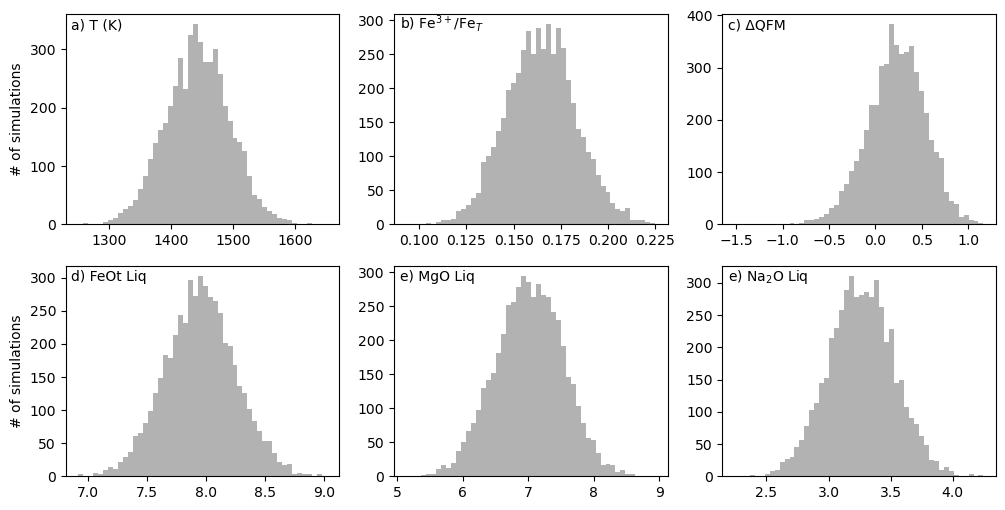

In [21]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,6))
bins=50
ax1.hist(df_noisy_abs['T_K_Liq'].loc[Dupdf['Sample_ID']==sam],  fc='black', alpha=0.3, bins=bins);
ax2.hist(df_noisy_abs['Fe3Fet_Liq'].loc[Dupdf['Sample_ID']==sam], fc='black', alpha=0.3, bins=bins);
ax3.hist(Buffer['DeltaQFM_Frost1991'].loc[Buffer['Sample_ID']==sam],  fc='black', alpha=0.3, bins=bins);
ax4.hist(df_noisy_abs['FeOt_Liq'].loc[df_noisy_abs['Sample_ID']==sam], fc='black', alpha=0.3, bins=bins);
ax5.hist(df_noisy_abs['MgO_Liq'].loc[df_noisy_abs['Sample_ID']==sam],  fc='black', alpha=0.3, bins=bins);
ax6.hist(df_noisy_abs['Na2O_Liq'].loc[df_noisy_abs['Sample_ID']==sam], fc='black', alpha=0.3, bins=bins);
ax1.set_ylabel('# of simulations')
ax4.set_ylabel('# of simulations')
ax1.annotate("a) T (K)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax2.annotate("b) Fe$^{3+}$/Fe$_{T}$", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax3.annotate("c) ΔQFM", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax4.annotate("d) FeOt Liq", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax5.annotate("e) MgO Liq", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)
ax6.annotate("e) Na$_2$O Liq", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=10)

fig.savefig('MonteCarlo_Muth_input.png', dpi=200)

(array([  14.,   84.,  342.,  849., 1345., 1269.,  726.,  294.,   65.,
          12.]),
 array([6.9169299 , 7.12741107, 7.33789224, 7.54837342, 7.75885459,
        7.96933576, 8.17981694, 8.39029811, 8.60077928, 8.81126046,
        9.02174163]),
 <BarContainer object of 10 artists>)

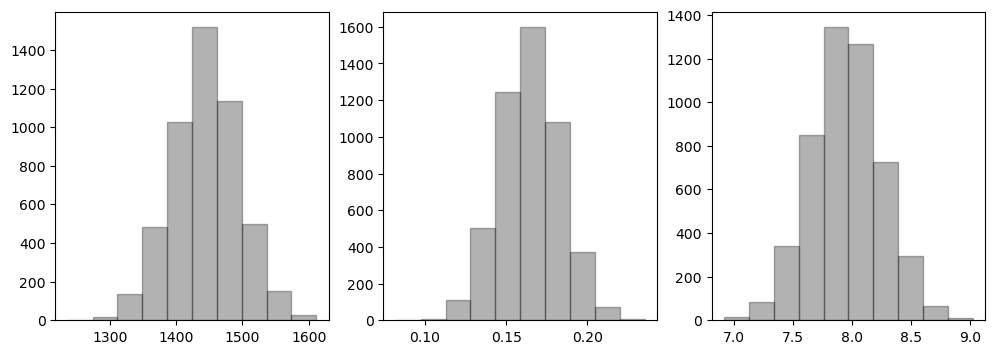

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.hist(Dupdf['T_K_MC'].loc[Dupdf['Sample_ID']==sam], ec='k', fc='black', alpha=0.3)
ax2.hist(Dupdf['Fe3Fet_Liq_MC'].loc[Dupdf['Sample_ID']==sam], ec='k', fc='black', alpha=0.3)
#ax3.hist(Buffer['DeltaQFM_Frost1991'].loc[Buffer['Sample_ID']==sam], ec='k', fc='black', alpha=0.3)
ax3.hist(df_noisy_abs['FeOt_Liq'].loc[df_noisy_abs['Sample_ID']==sam], ec='k', fc='black', alpha=0.3)

## Figure for text showing S6/St with errorbars

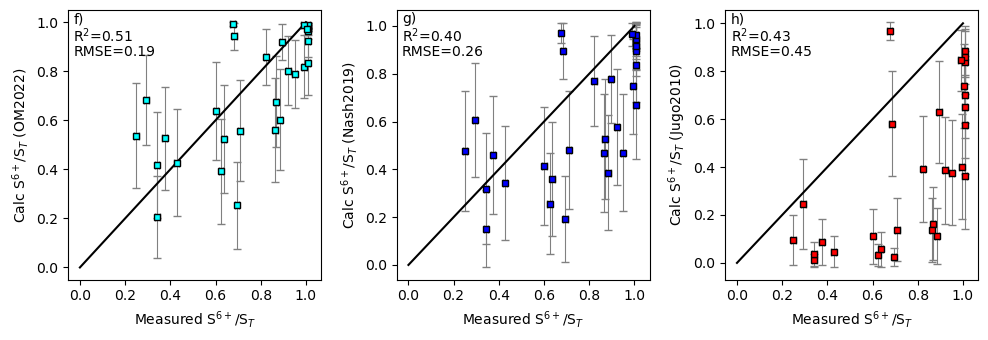

In [23]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3.5))
ms1=5




ax1.errorbar(df_out['S6+/∑S'],
         Stats_Fe_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Fe_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=ms1, mec='k', capsize=3, label='usingFe')


ax2.errorbar(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Nash_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='blue', ms=ms1, mec='k', capsize=3, label='usingFe')

ax3.errorbar(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'],
            xerr=0.01, yerr=Stats_Jugo_S6['St_dev_calc'],
               fmt='s', ecolor='grey', elinewidth=0.8, mfc='red', ms=ms1, mec='k', capsize=3, label='usingFe')

# s=ax1.scatter(df_out['S6+/∑S'],
#          Stats_Fe_S6['Mean_calc'], marker='s', s=50, edgecolors='k', linewidths=0.5,
#             c=S_types['S_ppm'], cmap='hot', zorder=100)
#fig.colorbar(s, ax=ax3)

ax1.plot([0, 1], [0, 1], '-k')
ax2.plot([0, 1], [0, 1], '-k')
ax3.plot([0, 1], [0, 1], '-k')
ax1.set_xlabel('Measured S$^{6+}$/S$_T$')
ax1.set_ylabel('Calc S$^{6+}$/S$_T$ (OM2022)')
ax2.set_xlabel('Measured S$^{6+}$/S$_T$')
ax2.set_ylabel('Calc S$^{6+}$/S$_T$ (Nash2019)')
ax3.set_xlabel('Measured S$^{6+}$/S$_T$')
ax3.set_ylabel('Calc S$^{6+}$/S$_T$ (Jugo2010)')

# Print stats on fig
O22_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Fe_S6['Mean_calc'], xy=False)
ax1.annotate('f)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax1.annotate('R$^{2}$='+str(O22_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax1.annotate('RMSE='+str(O22_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

Nash_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'], xy=False)
ax2.annotate('g)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

ax2.annotate('R$^{2}$='+str(Nash_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax2.annotate('RMSE='+str(Nash_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)


Jugo_stats=pt.calculate_R2(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'], xy=False)
ax3.annotate('h)', xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)
ax3.annotate('R$^{2}$='+str(Jugo_stats['R2']), xy=(0.02, 0.88), xycoords="axes fraction", fontsize=10)
ax3.annotate('RMSE='+str(Jugo_stats['RMSE']), xy=(0.02, 0.83), xycoords="axes fraction", fontsize=10)

fig.tight_layout()
fig.savefig('Muth_outputs.png', dpi=200)

In [24]:
pt.calculate_R2(df_out['S6+/∑S'], Stats_Jugo_S6['Mean_calc'], xy=False)

{'R2': '0.43',
 'RMSE': '0.45',
 'RMSE_num': 0.45,
 'P_val': '0.000',
 'Median': '-0.37',
 'Mean': '-0.38',
 'Int': array([-0.23649191]),
 'Grad': array([0.81139442])}

In [25]:
pt.calculate_R2(df_out['S6+/∑S'], Stats_Nash_S6['Mean_calc'], xy=False)

{'R2': '0.40',
 'RMSE': '0.26',
 'RMSE_num': 0.26,
 'P_val': '0.000',
 'Median': '-0.11',
 'Mean': '-0.14',
 'Int': array([0.12543386]),
 'Grad': array([0.65168829])}

In [26]:
pt.calculate_R2(df_out['S6+/∑S'], Stats_Fe_S6['Mean_calc'], xy=False)

{'R2': '0.51',
 'RMSE': '0.19',
 'RMSE_num': 0.19,
 'P_val': '0.000',
 'Median': '-0.03',
 'Mean': '-0.04',
 'Int': array([0.20789131]),
 'Grad': array([0.67653364])}

## We can also do Monte Carlo simulations for the SCSS (and all other calculations)

### Lets make a monte carlo simulation for the sulfide composition, say error is +-0.05 Fe/Fe+Ni+Cu

In [27]:
df_out['FeFeNiCu']=0.634
FeFeNiCu_Err=ss.add_noise_series(df_out['FeFeNiCu'], error_var=0.05,
error_type="Abs", error_dist="normal", N_dup=N_dups)
## 
df_noisy_abs['FeFeNiCu_MC']=FeFeNiCu_Err

In [28]:
SCSS_S2017_MC=ss.calculate_S2017_SCSS(df=df_noisy_abs, T_K=df_noisy_abs['T_K_Liq'], Fe_FeNiCu_Sulf=df_noisy_abs['FeFeNiCu_MC'],
                                   P_kbar=5)
                                   

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


### Now lets average these per sample

In [29]:
Stats_SCSS=pt.av_noise_samples_series(calc=SCSS_S2017_MC['SCSS2_ppm_ideal_Smythe2017'], sampleID=df_noisy_abs['Sample_ID'])
Stats_SCSS.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,632.791265,628.465034,99.856522,1179.964202,291.367196
1,BBL-5-33,5000,686.612475,679.062157,108.804908,1157.189080,378.950111
2,BBL-5-34,5000,674.769703,669.303291,106.102421,1125.802125,365.854107
3,BBL-5-43,5000,721.976611,717.836005,109.039362,1247.248507,377.452183
4,BBL-5-44,5000,725.863209,719.838117,112.461105,1149.038988,391.995576


## Lets also calculate the SCAS

In [30]:
SCAS_ZT_MC=ss.calculate_ZT2022_SCAS(df=df_noisy_abs, T_K=df_noisy_abs['T_K_Liq'],
                                   P_kbar=5)
                                   

g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\scas_calc.py:126: UserWarning: you entered a P_kbar, just be aware this function isnt actually pressure sensitive
  w.warn('you entered a P_kbar, just be aware this function isnt actually pressure sensitive')


In [31]:
STot_MC=ss.calculate_S_Total_SCSS_SCAS(SCSS=SCSS_S2017_MC['SCSS2_ppm_ideal_Smythe2017'],
                    SCAS=SCAS_ZT_MC['SCAS6_ppm'], S6St_Liq=noisy_ONeill_Fe_S6St['S6St_Liq'])
STot_MC.head()                              

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,742.831095,668.778295,74.052800,None,0.099690,668.778295,4667.688466,742.831095,46822.053180,74.052800,42154.364715
1,1202.613429,693.814757,508.798672,None,0.423077,693.814757,5550.225746,1202.613429,13118.697793,508.798672,7568.472048
2,1316.013873,816.290339,499.723534,None,0.379725,816.290339,5831.906748,1316.013873,15358.232432,499.723534,9526.325684
3,753.207099,595.520610,157.686489,None,0.209353,595.520610,4284.375539,753.207099,20464.797555,157.686489,16180.422016
4,1757.922978,771.556565,986.366413,None,0.561098,771.556565,5015.924518,1757.922978,8939.486228,986.366413,3923.561711


### Lets average this per sample

In [32]:
Stats_St=pt.av_noise_samples_series(calc=STot_MC['Total_S_ppm'], sampleID=df_noisy_abs['Sample_ID'])
Stats_St.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,939.723032,809.354215,458.837618,6829.059255,324.629297
1,BBL-5-33,5000,4159.531884,4212.506846,1799.782003,10853.649400,538.316259
2,BBL-5-34,5000,1894.558243,1457.746510,1319.429651,10593.878482,416.160690
3,BBL-5-43,5000,2114.071905,1597.793314,1499.059952,10977.754221,476.794370
4,BBL-5-44,5000,989.873838,877.730471,434.769157,7004.135066,401.542281


In [42]:
Stats_S6=pt.av_noise_samples_series(calc=STot_MC['SCAS_6_ppm'], sampleID=df_noisy_abs['Sample_ID'])
Stats_S6.head()
Stats_S2=pt.av_noise_samples_series(calc=STot_MC['SCSS_2_ppm'], sampleID=df_noisy_abs['Sample_ID'])
Stats_S2.head()

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,BBL-5-32,5000,632.791265,628.465034,99.856522,1179.964202,291.367196
1,BBL-5-33,5000,686.612475,679.062157,108.804908,1157.189080,378.950111
2,BBL-5-34,5000,674.769703,669.303291,106.102421,1125.802125,365.854107
3,BBL-5-43,5000,721.976611,717.836005,109.039362,1247.248507,377.452183
4,BBL-5-44,5000,725.863209,719.838117,112.461105,1149.038988,391.995576


## Lets calculate the STot using the measured S6/ST amount

In [43]:
df_out['S6St']=df_out['S6+/∑S']
df_out.loc[df_out['S6+/∑S']>1]=1
SCSS_S2017=ss.calculate_S2017_SCSS(df=df_out, T_K=Temp_3, Fe_FeNiCu_Sulf=0.634,
                                   P_kbar=5)
                                   

SCAS_ZT=ss.calculate_ZT2022_SCAS(df=df_out, T_K=Temp_3,
                                   P_kbar=5)
                                  
STot=ss.calculate_S_Total_SCSS_SCAS(SCSS=SCSS_S2017['SCSS2_ppm_ideal_Smythe2017'],
                    SCAS=SCAS_ZT['SCAS6_ppm'], S6St_Liq=df_out['S6+/∑S'])
STot.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\scas_calc.py:126: UserWarning: you entered a P_kbar, just be aware this function isnt actually pressure sensitive
  w.warn('you entered a P_kbar, just be aware this function isnt actually pressure sensitive')
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  n

,Total_S_ppm,S2_Tot_ppm,S6_Tot_ppm,deltaQFM,S6St_Liq,SCSS_2_ppm,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,2045.786001,625.153851,1420.632150,None,0.694419,625.153851,4364.741895,2045.786001,6285.460924,1420.632150,1920.719029
1,4840.565722,30.709456,4809.856266,None,0.993656,685.060485,4809.856266,107982.384252,4840.565722,107297.323767,30.709456
2,1076.254500,673.318103,402.936397,None,0.374388,673.318103,4977.354145,1076.254500,13294.653541,402.936397,8317.299396
3,955.162067,716.391457,238.770610,None,0.249979,716.391457,5478.824513,955.162067,21917.125172,238.770610,16438.300659
4,1093.450261,719.152091,374.298170,None,0.342309,719.152091,5359.471170,1093.450261,15656.809530,374.298170,10297.338360


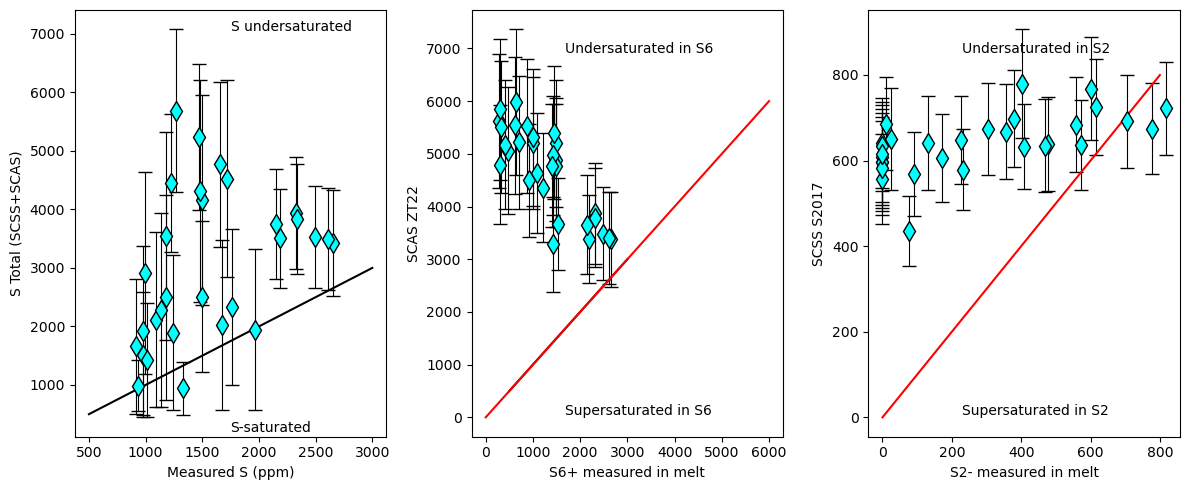

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))

ax1.errorbar(S_types['S_ppm'],
         Stats_St['Mean_calc'], xerr=0, yerr=Stats_St['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)
ax1.plot([500, 3000], [500, 3000], '-k')
ax2.plot([500, 3000], [500, 3000], '-k')
ax1.set_xlabel('Measured S (ppm)')
ax1.set_ylabel('S Total (SCSS+SCAS)')


  
    
ax2.errorbar((df_out['S6+/∑S'])*S_types['S_ppm'],
         Stats_S6['Mean_calc'], xerr=0, yerr=Stats_S6['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)
        

ax2.plot([0, 6000], [0, 6000], '-r')
ax2.set_xlabel('S6+ measured in melt')
ax2.set_ylabel('SCAS ZT22')

ax3.errorbar((1-(df_out['S6+/∑S']))*S_types['S_ppm'],
         Stats_S2['Mean_calc'], xerr=0, yerr=Stats_S2['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)
 

ax3.plot([0, 800], [0, 800], '-r')
ax3.set_xlabel('S2- measured in melt')
ax3.set_ylabel('SCSS S2017')
ax1.annotate("S-saturated", xy=(0.5, 0.01), xycoords="axes fraction", fontsize=10)
ax1.annotate("S undersaturated", xy=(0.5, 0.95), xycoords="axes fraction", fontsize=10)


ax2.annotate("Supersaturated in S6", xy=(0.3, 0.05), xycoords="axes fraction", fontsize=10)
ax2.annotate("Undersaturated in S6", xy=(0.3, 0.9), xycoords="axes fraction", fontsize=10)

ax3.annotate("Supersaturated in S2", xy=(0.3, 0.05), xycoords="axes fraction", fontsize=10)
ax3.annotate("Undersaturated in S2", xy=(0.3, 0.9), xycoords="axes fraction", fontsize=10)

fig.tight_layout()